In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
#Load Datasheet
import pandas as pd
df = pd.read_csv("Breast_Cancer_Wisconsin_Assignment.csv")

In [5]:
# Convert the problematic column to numeric and handle errors
df["Worst Smoothness"] = pd.to_numeric(df["Worst Smoothness"], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

In [7]:
# Drop ID column
df.drop(columns=["ID"], inplace=True)

In [9]:
# Convert 'Diagnosis' to binary: M = 1, B = 0
df["Diagnosis"] = LabelEncoder().fit_transform(df["Diagnosis"])

In [11]:
# Split into features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

In [13]:
# Split into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, root_mean_squared_error

results = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_binary = [1 if pred >= 0.5 else 0 for pred in lr_preds]
results['Linear Regression'] = {
    'Accuracy': accuracy_score(y_test, lr_binary),
    'RMSE': root_mean_squared_error(y_test, lr_preds)
}

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, dt_preds),
    'RMSE': root_mean_squared_error(y_test, dt_preds)
}

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
results['KNN'] = {
    'Accuracy': accuracy_score(y_test, knn_preds),
    'RMSE': root_mean_squared_error(y_test, knn_preds)
}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_preds),
    'RMSE': root_mean_squared_error(y_test, rf_preds)
}

# Show results
print(results)


{'Linear Regression': {'Accuracy': 0.9457831325301205, 'RMSE': 0.25464175340399775}, 'Decision Tree': {'Accuracy': 0.9036144578313253, 'RMSE': 0.3104602102825332}, 'KNN': {'Accuracy': 0.9337349397590361, 'RMSE': 0.2574200074605}, 'Random Forest': {'Accuracy': 0.963855421686747, 'RMSE': 0.19011727515734336}}


In [17]:
# Find the model with the highest accuracy
best_model = max(results.items(), key=lambda x: x[1]['Accuracy'])
print("Best Model:", best_model[0])
print("Performance:", best_model[1])

Best Model: Random Forest
Performance: {'Accuracy': 0.963855421686747, 'RMSE': 0.19011727515734336}



Top Features by Importance in Random Forest:

1. Worst Area: 0.1849
2. Worst Concave points: 0.1508
3. Worst Perimeter: 0.0958
4. Perimeter: 0.0724
5. Concavity: 0.0696
6. Concave points: 0.0607
7. Worst Radius: 0.0536
8. Area: 0.0517
9. Radius: 0.0436
10. Worst Concavity: 0.0347
11. Worst Compactness: 0.0222
12. SE Area: 0.0220
13. SE Radius: 0.0181
14. Worst Texture: 0.0125
15. Worst Smoothness: 0.0122
16. Compactness: 0.0119
17. SE Perimeter: 0.0107
18. Worst Symmetry: 0.0106
19. Texture: 0.0106
20. SE Compactness: 0.0073
21. Worst Fractal_dimension: 0.0068
22. SE Fractal_dimension: 0.0062
23. Smoothness: 0.0056
24. SE Smoothness: 0.0052
25. SE Symmetry: 0.0041
26. Symmetry: 0.0037
27. SE Concave points: 0.0037
28. SE Texture: 0.0036
29. Fractal_dimension: 0.0027
30. SE Concavity: 0.0025


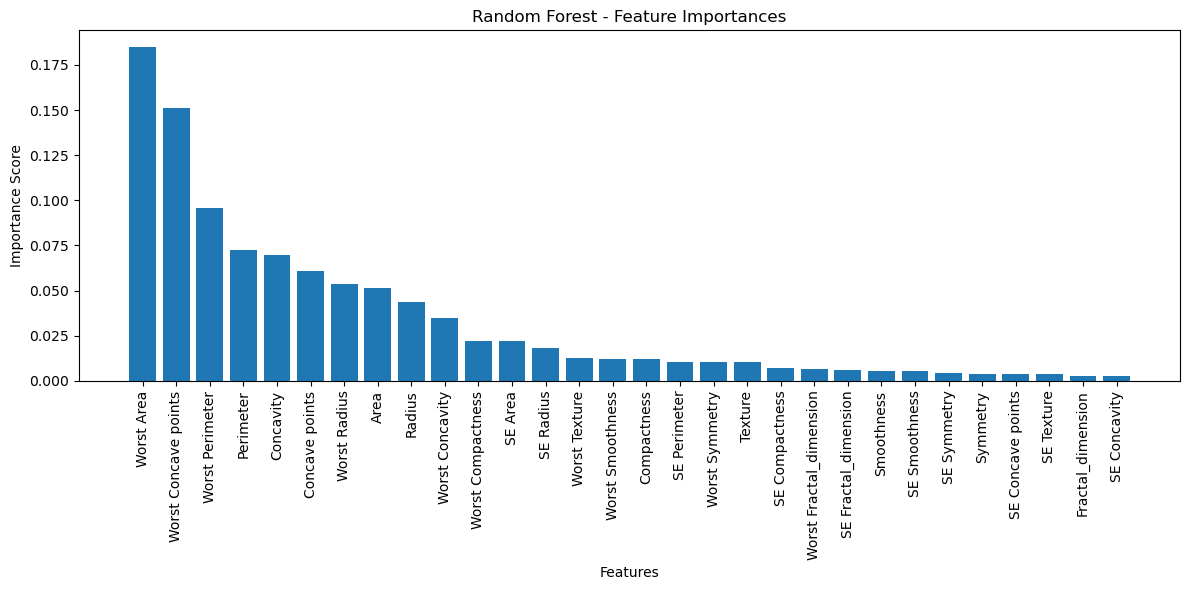

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Print ranked list of features
print("\nTop Features by Importance in Random Forest:\n")
for i in range(len(importances)):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot the importances
plt.figure(figsize=(12, 6))
plt.title("Random Forest - Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()